In [7]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 





In [9]:
df=pd.read_csv('ODI Wickets.csv')
df 

,Rank,Player,Country,Career Span,Matches,Innings,Balls,Runs,Wickets,Average,Economy,Strike Rate,4,5,Best Figures
0,1,M Muralidaran,SL,18,350,341,18811,12326,534,23.08,3.93,35.2,15,10,7/30
1,2,Wasim Akram,PAK,19,356,351,18186,11812,502,23.52,3.89,36.2,17,6,5/15
2,3,Waqar Younis,PAK,14,262,258,12698,9919,416,23.84,4.68,30.5,14,13,7/36
3,4,WPUJC Vaas,SL,14,322,320,15775,11014,400,27.53,4.18,39.4,9,4,8/19
4,5,Shahid Afridi,PAK,19,398,372,17670,13632,395,34.51,4.62,44.7,4,9,7/12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,75,JO Holder,WI,9,131,127,6043,5555,153,36.30,5.51,39.4,5,2,5/27
75,76,BAW Mendis,SL,7,87,84,4154,3324,152,21.86,4.80,27.3,7,3,6/13
76,77,Mohammed Shami,INDIA,9,82,81,4188,3910,152,25.72,5.60,27.5,9,1,5/69
77,78,UDU Chandana,SL,13,147,136,6142,4818,151,31.90,4.70,40.6,4,1,5/61


In [11]:
df['Runs']

0     12326
1     11812
2      9919
3     11014
4     13632
      ...  
74     5555
75     3324
76     3910
77     4818
78     5058
Name: Runs, Length: 79, dtype: int64

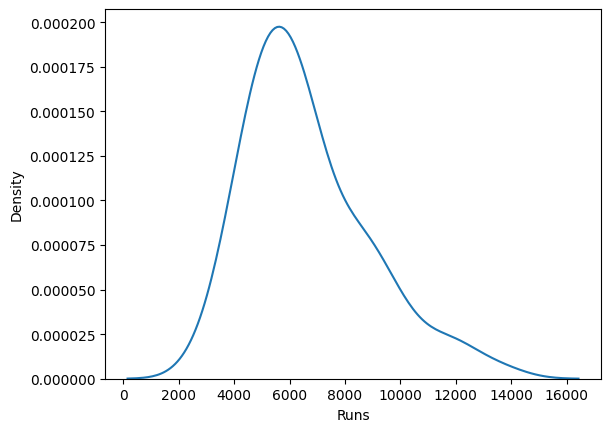

In [71]:
sns.kdeplot(x=df['Runs'])
plt.savefig('Initial KDEPlot Runs.png')
plt.show()

In [15]:
df['Runs'].skew()

np.float64(0.9788955812286305)

In [17]:
df['Runs'].kurtosis()

np.float64(0.7166749748637837)

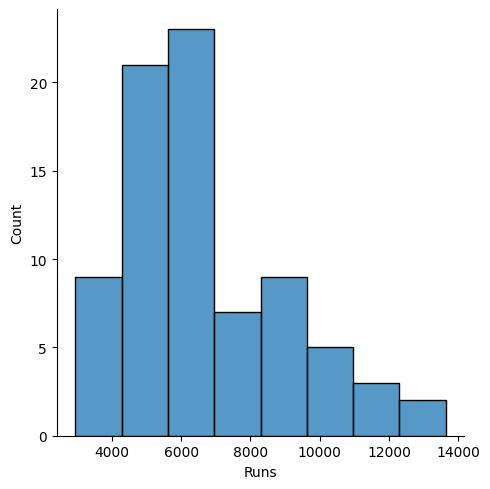

In [72]:
sns.displot(df['Runs'])
plt.savefig('initial displot Runs Column.png')

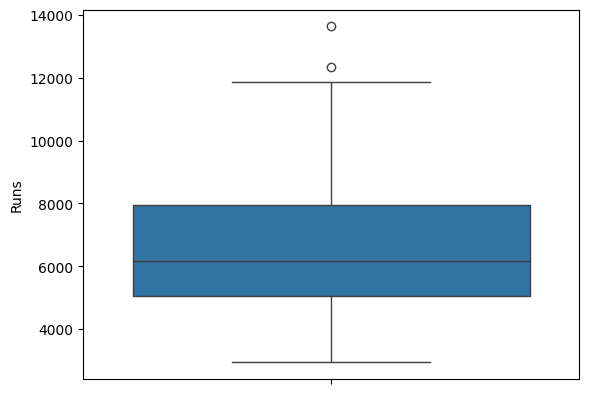

In [73]:
sns.boxplot(y=df['Runs'])
plt.savefig('initial boxplot Runs Column.png')

In [23]:
df['Runs'].mean()

np.float64(6634.341772151899)

In [25]:
df['Runs'].median()

np.float64(6169.0)

# Applying Function Transformer 

In [27]:
from sklearn.preprocessing import FunctionTransformer


In [29]:
trf1=FunctionTransformer(func=np.log1p)
trf2=FunctionTransformer(func=np.sqrt)
trf3=FunctionTransformer(func=np.square)
trf4=FunctionTransformer(func=lambda x: 1 / (x + 1) )


In [31]:
df_transformed1=trf1.fit_transform(df['Runs'])
df_transformed2=trf2.fit_transform(df['Runs'])
df_transformed3=trf3.fit_transform(df['Runs'])
df_transformed4=trf4.fit_transform(df['Runs'])


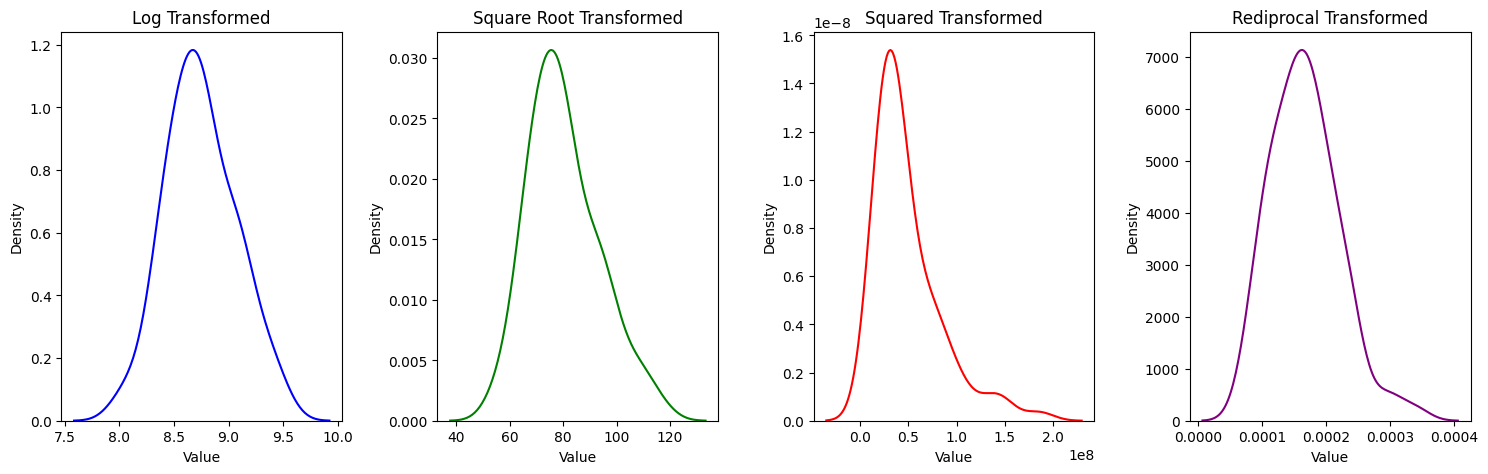

In [74]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))  # 1x4 grid, adjusted figure size for better width

# Plot the KDEs
sns.kdeplot(df_transformed1, ax=axes[0], color='blue')
axes[0].set_title('Log Transformed')  # Added title
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')

sns.kdeplot(df_transformed2, ax=axes[1], color='green')
axes[1].set_title('Square Root Transformed') # Added title
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')

plt.savefig('Initial KDEPlot Runs.png')='red')
axes[2].set_title('Squared Transformed') # Added title
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Density')

sns.kdeplot(df_transformed4, ax=axes[3], color='purple')
axes[3].set_title('Rediprocal Transformed') # Added Title
axes[3].set_xlabel('Value')
axes[3].set_ylabel('Density')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('all_transformation_runs_column.png')
plt.show()


In [35]:
df_transformed1.skew()

np.float64(0.20152053253642585)

In [37]:
df_transformed1.kurtosis()

np.float64(-0.24982213286124733)

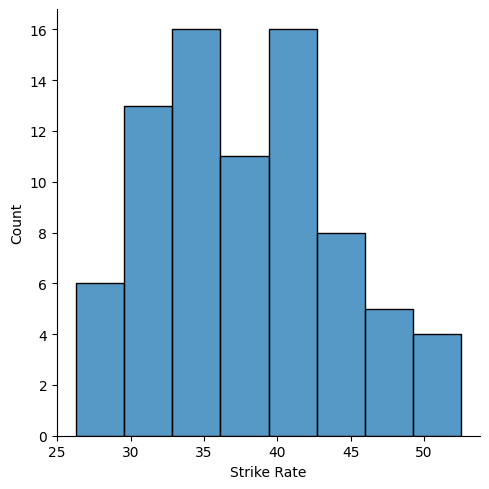

In [75]:
sns.displot(df['Strike Rate'])
plt.savefig('Initial Displot Srike rate Column.png')

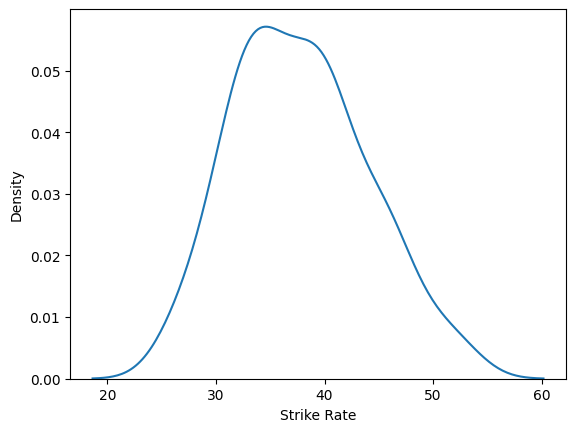

In [76]:
sns.kdeplot(df['Strike Rate'])
plt.savefig('Initial kdeplot Srike rate Column.png')

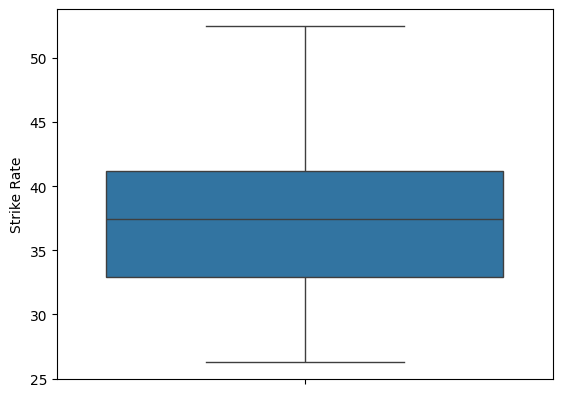

In [77]:
sns.boxplot(df['Strike Rate'])
plt.savefig('Initial Boxplot Srike rate Column.png')

In [45]:
df_transformed11=trf1.fit_transform(df['Strike Rate'])
df_transformed21=trf2.fit_transform(df['Strike Rate'])
df_transformed31=trf3.fit_transform(df['Strike Rate'])
df_transformed41=trf4.fit_transform(df['Strike Rate'])


In [47]:
df['Strike Rate'].skew()

np.float64(0.3489962903745949)

In [49]:
df['Strike Rate'].kurtosis()

np.float64(-0.4089972821552865)

In [51]:
df['Strike Rate'].mean()

np.float64(37.78354430379747)

In [53]:
df['Strike Rate'].median()

np.float64(37.4)

In [55]:
print('Skewness:\n',df_transformed11.skew(),df_transformed21.skew(),df_transformed31.skew(),df_transformed41.skew(),'\nKurtosis:\n',df_transformed11.kurtosis(),df_transformed21.kurtosis(),df_transformed31.kurtosis(),df_transformed41.kurtosis())

Skewness:
 0.01250278017485942 0.1768270910672013 0.6911924596714688 0.3304088047566727 
Kurtosis:
 -0.5383643206248716 -0.5134748542130518 0.03727375666310051 -0.35295498429548156


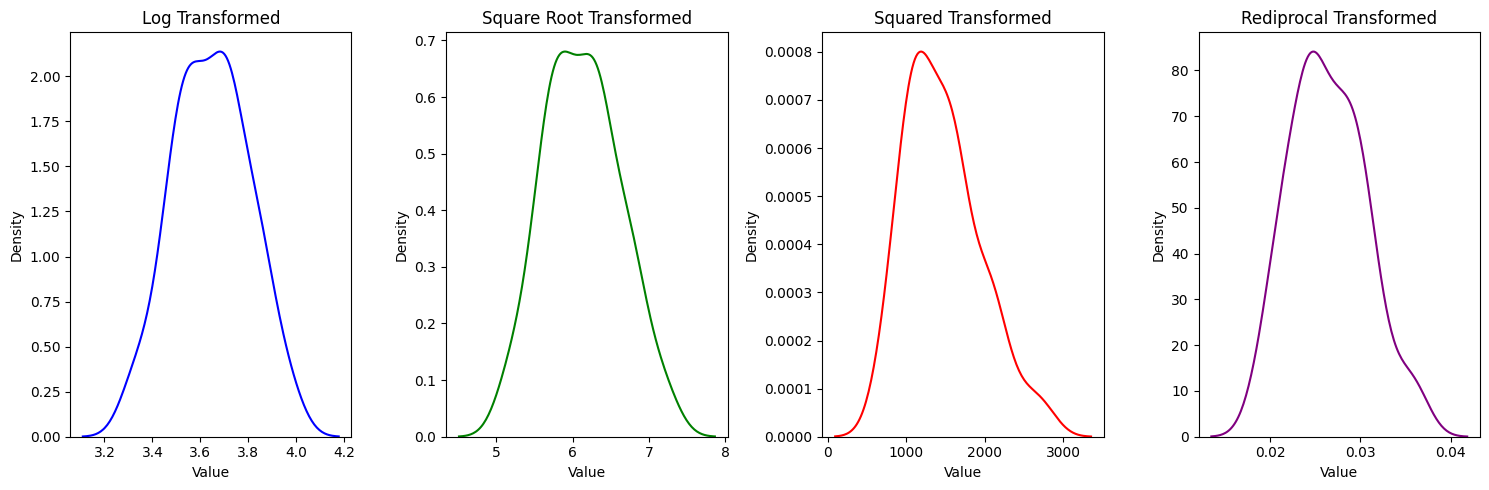

In [78]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))  # 1x4 grid, adjusted figure size for better width

# Plot the KDEs
sns.kdeplot(df_transformed11, ax=axes[0], color='blue')
axes[0].set_title('Log Transformed')  # Added title
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')

sns.kdeplot(df_transformed21, ax=axes[1], color='green')
axes[1].set_title('Square Root Transformed') # Added title
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')

sns.kdeplot(df_transformed31, ax=axes[2], color='red')
axes[2].set_title('Squared Transformed') # Added title
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Density')

sns.kdeplot(df_transformed41, ax=axes[3], color='purple')
axes[3].set_title('Rediprocal Transformed') # Added Title
axes[3].set_xlabel('Value')
axes[3].set_ylabel('Density')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('KDE PLot all_transformation_Strike Rate.png')
plt.show()

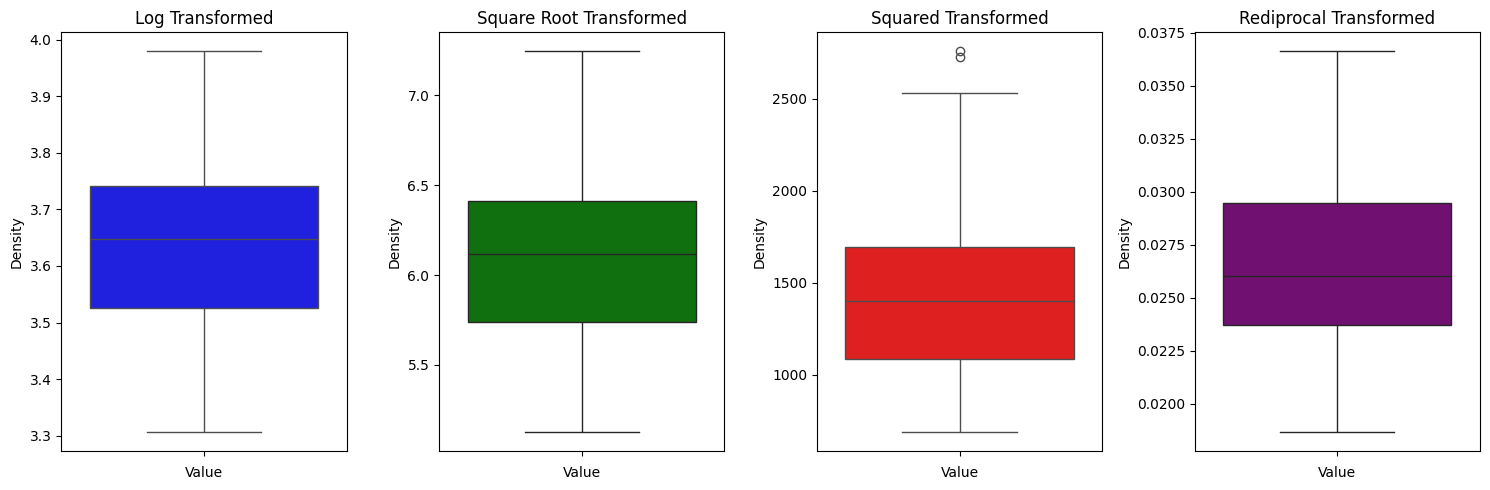

In [79]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))  # 1x4 grid, adjusted figure size for better width

# Plot the KDEs
sns.boxplot(df_transformed11, ax=axes[0], color='blue')
axes[0].set_title('Log Transformed')  # Added title
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')

sns.boxplot(df_transformed21, ax=axes[1], color='green')
axes[1].set_title('Square Root Transformed') # Added title
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')

sns.boxplot(df_transformed31, ax=axes[2], color='red')
axes[2].set_title('Squared Transformed') # Added title
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Density')

sns.boxplot(df_transformed41, ax=axes[3], color='purple')
axes[3].set_title('Rediprocal Transformed') # Added Title
axes[3].set_xlabel('Value')
axes[3].set_ylabel('Density')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('BOx plot all_transformation_Strike Rate.png')
plt.show()

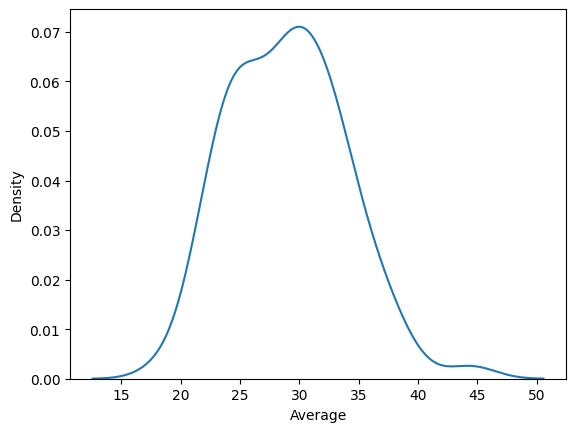

In [80]:
sns.kdeplot(df['Average'])
plt.savefig('Initial KDEPLOT Average Column.png')

In [63]:
df['Average'].skew()

np.float64(0.3977959354477034)

In [65]:
df['Average'].kurtosis()

np.float64(0.1499621740002528)

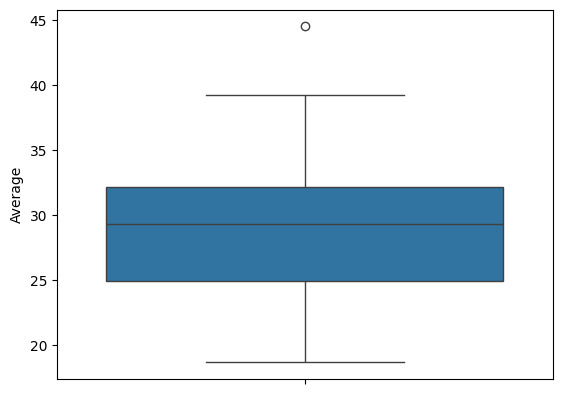

In [83]:
sns.boxplot(df['Average'])
plt.savefig('Initial BOxplot Average Column.png')

C:\Users\hp\AppData\Local\Temp\ipykernel_8004\3510848933.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Average'])


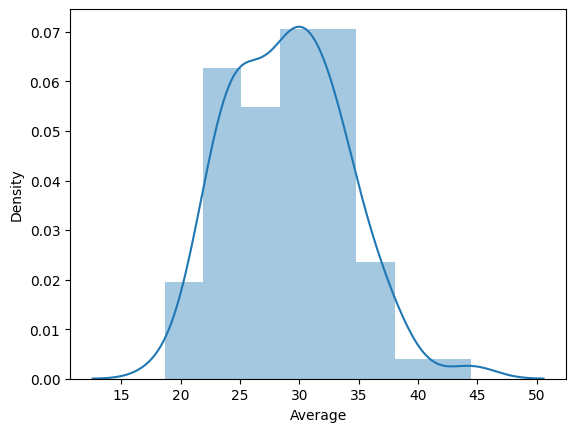

In [82]:
sns.distplot(df['Average'])
plt.savefig('Initial Distplot Average Column.png')

# Now Applying Transformations 

In [68]:
df_transformed12=trf1.fit_transform(df['Average'])
df_transformed22=trf2.fit_transform(df['Average'])
df_transformed32=trf3.fit_transform(df['Average'])
df_transformed42=trf4.fit_transform(df['Average'])

In [69]:
print('Skewness:\n',df_transformed12.skew(),df_transformed22.skew(),df_transformed32.skew(),df_transformed42.skew(),'\nKurtosis:\n',df_transformed12.kurtosis(),df_transformed22.kurtosis(),df_transformed32.kurtosis(),df_transformed42.kurtosis())

Skewness:
 -0.022534877322662114 0.17471355790761378 0.8986682906084438 0.4149469761538666 
Kurtosis:
 -0.31552668324431954 -0.17705993852603896 1.4967668869716282 -0.13487881314719186


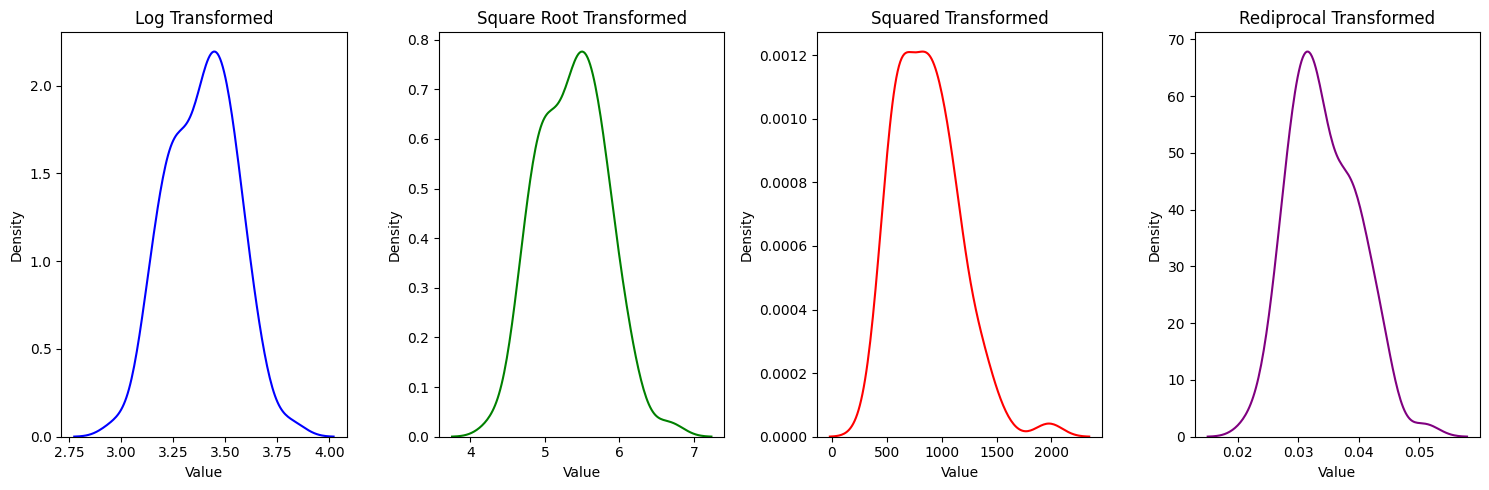

In [84]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))  # 1x4 grid, adjusted figure size for better width

# Plot the KDEs
sns.kdeplot(df_transformed12, ax=axes[0], color='blue')
axes[0].set_title('Log Transformed')  # Added title
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')

sns.kdeplot(df_transformed22, ax=axes[1], color='green')
axes[1].set_title('Square Root Transformed') # Added title
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')

sns.kdeplot(df_transformed32, ax=axes[2], color='red')
axes[2].set_title('Squared Transformed') # Added title
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Density')

sns.kdeplot(df_transformed42, ax=axes[3], color='purple')
axes[3].set_title('Rediprocal Transformed') # Added Title
axes[3].set_xlabel('Value')
axes[3].set_ylabel('Density')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('KDE PLoe all_transformation Average Column.png')
plt.show()